In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!tree --filelimit=10

. [11 entries exceeds filelimit, not opening dir]

0 directories, 0 files


# Importation des données #

In [3]:
features_PumpItUp = pd.read_csv("training_set.csv")
labels_PumpItUp  = pd.read_csv("training_set_labels.csv")
features_submission_PumpItUp = pd.read_csv("submission_set_features.csv")

# Visualisations initiales #

In [4]:
features_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
print("data size = {0}\n".format(features_PumpItUp.size))
print(features_PumpItUp.columns)

data size = 2376000

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [6]:
labels_PumpItUp.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


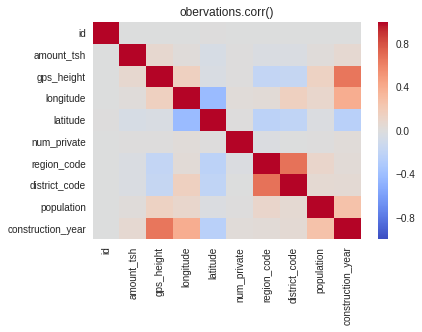

In [7]:
sns.heatmap(features_PumpItUp.corr(),cmap='coolwarm')
plt.title('obervations.corr()')

In [8]:
data_PumpItUp = pd.concat([features_PumpItUp, labels_PumpItUp["status_group"]], axis=1)

In [9]:
data_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
print("data size = {0}\n".format(data_PumpItUp.size))
print(data_PumpItUp.columns)

data size = 2435400

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


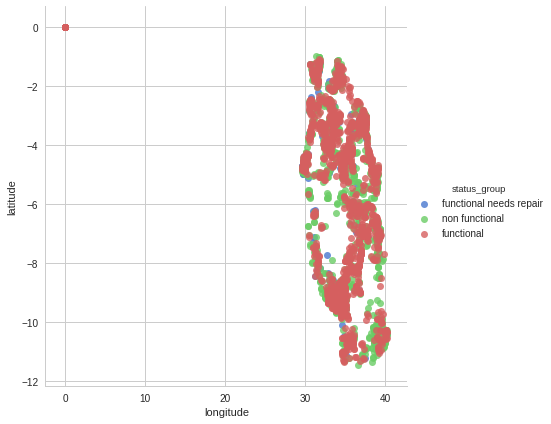

In [11]:
sns.set_style('whitegrid')
sns.lmplot('longitude','latitude',
           data=data_PumpItUp.sample(3000), hue='status_group',
           palette='muted',size=6,aspect=1,fit_reg=False)

In [12]:
data_PumpItUp.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
data_PumpItUp.drop(['date_recorded', 'funder', 'gps_height', 'installer','longitude','latitude','wpt_name',
           'num_private','basin','subvillage','region','region_code','district_code','lga','ward','public_meeting', 'recorded_by',
        'scheme_management','scheme_name', 'quality_group', 'quantity_group','extraction_type_group','extraction_type_class'], axis=1, inplace=True)

In [14]:
data_PumpItUp.columns

Index(['id', 'amount_tsh', 'population', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [15]:
data_PumpItUp.head()

,id,amount_tsh,population,permit,construction_year,extraction_type,management,management_group,payment,payment_type,water_quality,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,109,False,1999,gravity,vwc,user-group,pay annually,annually,soft,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,280,True,2010,gravity,wug,user-group,never pay,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,250,True,2009,gravity,vwc,user-group,pay per bucket,per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,58,True,1986,submersible,vwc,user-group,never pay,never pay,soft,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,0,True,0,gravity,other,other,never pay,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [16]:
import numpy
from sklearn.feature_extraction import DictVectorizer


def one_hot_dataframe(data, cols, replace=False):
    """ Takes a dataframe and a list of columns that need to be encoded.
        Returns a 3-tuple comprising the data, the vectorized data,
        and the fitted vectorizor.
    """
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)


In [17]:
data_PumpItUp, _, _ = one_hot_dataframe(data_PumpItUp, ['permit', 'extraction_type','management','management_group',
                                                        'source','source_type','source_class','waterpoint_type','waterpoint_type_group',
                                                        'payment', 'payment_type','water_quality','quantity']
                                        , replace=True)

In [18]:
data_PumpItUp.head()

,id,amount_tsh,population,construction_year,status_group,extraction_type=afridev,extraction_type=cemo,extraction_type=climax,extraction_type=gravity,extraction_type=india mark ii,...,waterpoint_type=dam,waterpoint_type=hand pump,waterpoint_type=improved spring,waterpoint_type=other,waterpoint_type_group=cattle trough,waterpoint_type_group=communal standpipe,waterpoint_type_group=dam,waterpoint_type_group=hand pump,waterpoint_type_group=improved spring,waterpoint_type_group=other
0,69572,6000.0,109,1999,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8776,0.0,280,2010,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,34310,25.0,250,2009,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,67743,0.0,58,1986,non functional,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,19728,0.0,0,0,functional,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
data_PumpItUp.shape

(59400, 101)

In [20]:
data_PumpItUp = data_PumpItUp.loc[data_PumpItUp['extraction_type=other - mkulima/shinyanga'] ==0.0].drop(['extraction_type=other - mkulima/shinyanga'], axis=1)

In [21]:
data_PumpItUp.shape

(59398, 100)

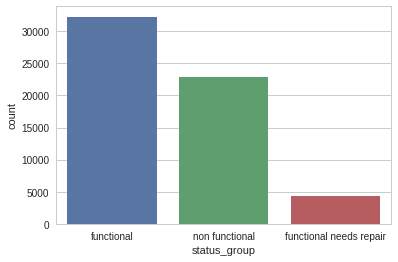

In [22]:
ax = sns.countplot(x="status_group", data=data_PumpItUp)

In [23]:
data_PumpItUp.describe()

,id,amount_tsh,population,construction_year,extraction_type=afridev,extraction_type=cemo,extraction_type=climax,extraction_type=gravity,extraction_type=india mark ii,extraction_type=india mark iii,...,waterpoint_type=dam,waterpoint_type=hand pump,waterpoint_type=improved spring,waterpoint_type=other,waterpoint_type_group=cattle trough,waterpoint_type_group=communal standpipe,waterpoint_type_group=dam,waterpoint_type_group=hand pump,waterpoint_type_group=improved spring,waterpoint_type_group=other
count,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,...,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000,59398.000000
mean,37115.190444,317.661080,179.915199,1300.663086,0.029799,0.001515,0.000539,0.450857,0.040405,0.001650,...,0.000118,0.294387,0.013199,0.107411,0.001953,0.582932,0.000118,0.294387,0.013199,0.107411
std,21453.083407,2997.624458,471.489234,951.617629,0.170034,0.038896,0.023205,0.497583,0.196910,0.040586,...,0.010855,0.455771,0.114128,0.309638,0.044149,0.493078,0.010855,0.455771,0.114128,0.309638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18520.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37061.500000,0.000000,25.000000,1986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55655.750000,20.000000,215.000000,2004.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74247.000000,350000.000000,30500.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Learning #
----------------------------------------
I have tried several models for classification. Here are the ones that acheived an acccuracy around 69-76 % without fine tuning and that I decided to keep for grid search:
* Random forest
* KNeighborsClassifier





I started with the initial split and the import of the metrics package

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, log_loss

In [28]:
X = data_PumpItUp.drop(["id","status_group"],axis=1)
y = data_PumpItUp["status_group"]
X = X.fillna(X.mean())

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=101)

 ## Random Forest ##

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier_RandomForest = RandomForestClassifier()
classifier_RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
y_pred_RandomForest = classifier_RandomForest.predict(X_test)

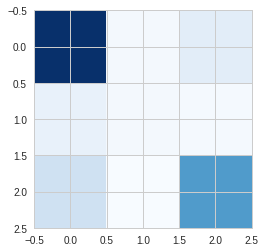

In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred_RandomForest)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.show()

In [34]:
print(classification_report(y_test,y_pred_RandomForest))

                         precision    recall  f1-score   support

             functional       0.77      0.87      0.81      9672
functional needs repair       0.42      0.23      0.30      1294
         non functional       0.80      0.72      0.76      6854

            avg / total       0.76      0.77      0.76     17820



## Grid search for Random Forest ##

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = { "n_estimators"      : [200,400,800],
           "criterion"         : ["gini", "entropy"],
           "max_depth"         : [10, 20, 40]
             }


In [76]:
classifier_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(classifier_RF, param_grid, n_jobs =8,cv=5
             )



In [77]:
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'n_estimators': [200, 400, 800], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
print(grid_search_RF.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 800}


In [79]:
y_pred_RandomForest_grid = grid_search_RF.predict(X_test)

In [80]:
print(classification_report(y_test,y_pred_RandomForest_grid))

                         precision    recall  f1-score   support

             functional       0.75      0.92      0.83      9672
functional needs repair       0.58      0.17      0.26      1294
         non functional       0.84      0.70      0.77      6854

            avg / total       0.78      0.78      0.76     17820



## K-neighbors ##

In [93]:
from sklearn.neighbors import KNeighborsClassifier


In [96]:
classifier_kneighbors = KNeighborsClassifier()
classifier_kneighbors.fit(X_train, y_train)
y_pred_kneighbors = classifier_kneighbors.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred_kneighbors))

                         precision    recall  f1-score   support

             functional       0.70      0.84      0.76      9672
functional needs repair       0.33      0.13      0.19      1294
         non functional       0.73      0.62      0.67      6854

            avg / total       0.69      0.70      0.68     17820



## grid search for k-neighbors ##

In [113]:
param_grid = { "n_neighbors" : [10],"weights" : ["uniform","distance"],
              "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"] }

In [114]:
classifier_Kneighbors = KNeighborsClassifier()
grid_search_Kneighbors = GridSearchCV(classifier_Kneighbors, param_grid, n_jobs =8,cv=5
             )


In [ ]:
grid_search_Kneighbors.fit(X_train, y_train)

In [ ]:
print(grid_search_Kneighbors.best_params_)

In [ ]:
y_pred_Kneighbors_grid = grid_search_Kneighbors.predict(X_test)
print(classification_report(y_test,y_pred_Kneighbors_grid))

# Majority vote #

In [46]:
#import pickle
# save the classifier
#with open('classifier_benchmark_RandomForest.pkl', 'wb') as fid:
#    pickle.dump(classifier, fid)    

# load it again
#with open('classifier_benchmark_RandomForest.pkl', 'rb') as fid:
#    classifier_loaded = pickle.load(fid)

In [47]:
from sklearn.ensemble import  VotingClassifier #classifier_xgboost = XGBClassifier()
from xgboost import XGBClassifier

clf1 = RandomForestClassifier(class_weight="balanced",n_estimators =200,n_jobs=8)
clf2 = AdaBoostClassifier()
clf3 = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
clf4 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('RF', clf1), ('AdaBoost', clf2), ('Bag', clf3), ('XGB',clf4)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)


/home/louis/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
y_pred_vote_soft= eclf1.predict(X_test)
print(classification_report(y_test,y_pred_vote_soft))

                         precision    recall  f1-score   support

             functional       0.75      0.92      0.83      9672
functional needs repair       0.55      0.15      0.23      1294
         non functional       0.85      0.69      0.76      6854

            avg / total       0.77      0.78      0.76     17820



In [66]:
print(classification_report(y_test,y_pred_vote_hard))

                         precision    recall  f1-score   support

             functional       0.77      0.87      0.82      9672
functional needs repair       0.42      0.28      0.33      1294
         non functional       0.82      0.72      0.76      6854

            avg / total       0.76      0.77      0.76     17820



# Soumission #

In [81]:
features_submission_PumpItUp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [82]:
features_submission_PumpItUp_forPrediction = features_submission_PumpItUp.drop(['date_recorded', 'funder', 'gps_height', 'installer','longitude','latitude','wpt_name',
           'num_private','basin','subvillage','region','region_code','district_code','lga','ward','public_meeting', 'recorded_by',
        'scheme_management','scheme_name', 'quality_group', 'quantity_group','extraction_type_group','extraction_type_class'], axis=1)

In [83]:
features_submission_PumpItUp_forPrediction, _, _ = one_hot_dataframe(features_submission_PumpItUp_forPrediction, ['permit', 'extraction_type','management','management_group',
                                                        'source','source_type','source_class','waterpoint_type','waterpoint_type_group',
                                                        'payment', 'payment_type','water_quality','quantity']
                                        , replace=True)

In [84]:
X_submission = features_submission_PumpItUp_forPrediction.drop(["id"],axis=1)
X_submission = X_submission.fillna(X_submission.mean())

In [85]:
prediction_submission =grid_search.predict(X_submission)

In [86]:
import pickle
# save the classifier
with open('classifier_RandomForest_n_estimators-800_depth-20.pkl', 'wb') as fid:
    pickle.dump(grid_search, fid)

## Merge des resultats pour soumission et enregistrement ##

In [87]:

df1 = features_submission_PumpItUp[["id"]]
df2 = pd.DataFrame(prediction_submission)
df1.reset_index(drop=True, inplace=True)

results = pd.concat( [df1, df2], axis=1) 

In [88]:
results.reset_index(drop=True, inplace=True)
results.columns
results.rename(columns={0: 'status_group'}, inplace=True)

In [89]:
results.to_csv("results_RandomForest-n_estimators-800.csv",index=False,index_label=False)